# 长短期记忆网络

In [1]:
import torch
import My_utils
from torch import nn

batch_size, num_steps = 32, 35
train_iter, vocab = My_utils.load_data_time_machine(batch_size, num_steps)

In [2]:
def get_lstm_params(vocab_size, num_hiddens, device):
    num_inputs = num_outputs = vocab_size
    
    def normal(shape):
        return torch.randn(size=shape, device=device) * 0.01
    
    def three():
        return (normal((num_inputs, num_hiddens)),
                normal((num_hiddens, num_hiddens)),
                torch.zeros(num_hiddens, device=device))
    
    W_xi, W_hi, b_i = three()  # 输入门
    W_xf, W_hf, b_f = three()  # 遗忘门
    W_xo, W_ho, b_o = three()  # 输出门
    W_xc, W_hc, b_c = three()  # 候选记忆元参数
    
    # 输出层
    W_hq = normal((num_hiddens, num_outputs))
    b_q = torch.zeros(num_outputs, device=device)
    
    params = [W_xi, W_hi, b_i, W_xf, W_hf, b_f, W_xo, W_ho, b_o, W_xc, W_hc, b_c, W_hq, b_q]
    for param in params:
        param.requires_grad_(True)
    return params

def init_lstm_state(batch_size, num_hiddens, device):
    return (torch.zeros((batch_size, num_hiddens), device=device),torch.zeros((batch_size, num_hiddens), device=device))

def lstm(inputs, state, params):
    [W_xi, W_hi, b_i, W_xf, W_hf, b_f, W_xo, W_ho, b_o, W_xc, W_hc, b_c, W_hq, b_q] = params
    (H, C) = state
    outputs = []
    for X in inputs:
        I = torch.sigmoid((X @ W_xi) + (H @ W_hi) + b_i)
        F = torch.sigmoid((X @ W_xf) + (H @ W_hf) + b_f)
        O = torch.sigmoid((X @ W_xo) + (H @ W_ho) + b_o)
        C_tilda = torch.tanh((X @ W_xc) + (H @ W_hc) + b_c)
        C = F * C + I * C_tilda
        H = O * torch.tanh(C)
        Y = (H @ W_hq) + b_q
        outputs.append(Y)
    return torch.cat(outputs, dim=0), (H, C)

perplexity: 1.5, speed: 31622.9 words/sec on cuda:0
time traveller proceeded on a can sour in the united statesyou w
travellerift for the ure prichtle of the pracel must four i


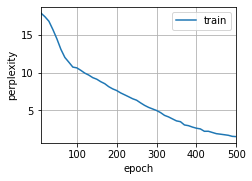

In [3]:
vocab_size, num_hiddens, device = len(vocab), 256, My_utils.try_gpu()
num_epochs, lr = 500, 1
model = My_utils.RNNModelScratch(vocab_size, num_hiddens, device, get_lstm_params, init_lstm_state, lstm)
My_utils.train_seq(model, train_iter, vocab, lr, num_epochs, device, use_random_iter=False)